<h1><center> NeuroML-DB Analysis - Data Cleaning and Initial EDA plots for Model + Experiment Embedding </center></h1>

In [123]:
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd

In [124]:
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [125]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')

### !-- Note: These two pickle files were too large to include on GitHub

Will include elsewhere with future work

In [126]:
# Open the 3.0x rheobase file
filename = os.path.join(path2data,'three_df.pkl')
with open(filename, 'rb') as f:
    df_30x = pickle.load(f)

In [127]:
# Open the 1.5x rheobase file
filename = os.path.join(path2data,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df_15x = pickle.load(f)

In [128]:
# Check to see what is there.  Might also check to see if there is data there.
df_30x.head()

,AHP1_depth_from_peak,AHP2_depth_from_peak,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_diff,AHP_depth_from_peak,AHP_slow_time,AHP_time_from_peak,AP1_amp,...,threshold_v,trough_index,trough_t,trough_v,upstroke,upstroke_downstroke_ratio,upstroke_index,upstroke_t,upstroke_v,width
NMLCL000842,[94.35272730093455],[95.35519817208674],"[-5.467570208257911, -5.517161117356764, -5.51...","[-74.25972727270074, -74.3093181817996, -74.30...","[-71.3183428569876, -71.31639387745074, -71.30...","[-0.04959090909885333, 0.0010454545395930381, ...","[94.35272730093455, 95.35519817208674, 95.5217...","[0.2125, 0.2125, 0.2125, 0.2125, 0.21338912133...","[2.300000000000523, 2.299999999997908, 2.29999...",[75.6438500248334],...,-55.573728,198797.707317,1.987977,-74.037120,324.153334,2.232816,198562.573171,1.985626,-3.755633,0.000730
NMLCL000150,[85.32297500543316],[82.67246665997659],"[-0.7747521750732176, -0.5658438417432876, -0....","[-69.3053749999928, -69.09646666666286, -68.98...","[-68.48556135589118, -68.44087266879296, -68.3...","[0.20890833332992997, 0.10816363635242965, 0.2...","[85.32297500543316, 82.67246665997659, 81.8509...","[0.16293929712460065, 0.14739884393063585, 0.1...","[2.8000000000006366, 2.9999999999972715, 2.999...",[72.12080000359134],...,-45.062270,182887.857143,1.828879,-67.929939,221.251466,2.326160,181719.904762,1.817199,-8.663569,0.000743
NMLCL000160,[90.26799248972013],[88.04533332533875],"[-1.0595340658517785, -1.5962215658529857, -1....","[-72.21231249999879, -72.749, -72.758339130433...","[-72.69567380950369, -72.74720869564989, -72.7...","[-0.5366875000012072, -0.009339130433332343, 0...","[90.26799248972013, 88.04533332533875, 87.5853...","[0.17894736842105263, 0.1513353115727003, 0.09...","[3.9000000000008868, 4.399999999995998, 4.5999...",[72.7976799870559],...,-54.709880,184062.315789,1.840623,-72.134295,244.702074,2.498303,182681.578947,1.826816,-7.589454,0.000788
NMLCL000480,[96.94536470012301],[92.10237600292912],"[0.2957104849672447, 0.6296991908565985, -0.28...","[-70.77276470587192, -70.43877599998257, -71.3...","[-69.31302439021124, -70.12247692310284, -70.0...","[0.3339887058893538, -0.9113416470725468, -0.0...","[96.94536470012301, 92.10237600292912, 94.9155...","[0.1424581005586592, 0.13315926892950392, 0.12...","[3.0999999999971806, 3.1999999999970896, 3.099...",[77.66641817488104],...,-50.722451,188266.275862,1.882663,-71.583144,378.129070,3.173304,187153.344828,1.871533,-0.664817,0.000796
NMLCL000978,[86.4608399951427],[79.71521295596509],"[7.226235540201017, 6.141522599033536, 5.66764...","[-68.84283999999901, -69.9275529411665, -70.40...","[-68.73838297850239, -69.0910782606726, -69.05...","[-1.0847129411674814, -0.4738818414184749, -0....","[86.4608399951427, 79.71521295596509, 81.33483...","[0.4273504273504855, 0.4214876033057851, 0.425...","[3.400000000000773, 3.7000000000008413, 3.6999...",[73.02886666015736],...,-54.894278,200697.205714,2.006972,-69.426235,209.525059,2.990292,200314.634286,2.003146,-6.602247,0.001017


In [129]:
# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
df_15x = df_15x.fillna(0).applymap(f)
df_30x = df_30x.fillna(0).applymap(f)

In [130]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')

In [131]:
print("There are %d models+data and %d features" % df.shape)

There are 646 models+data and 466 features


In [132]:
# Impute remaining missing values with 0.
df = df.fillna(0)

In [13]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)

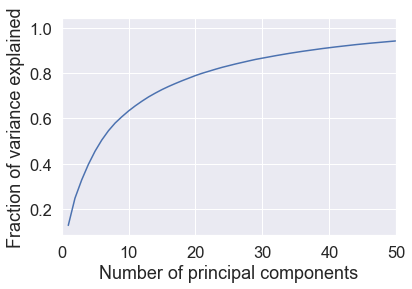

In [14]:
# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [15]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)

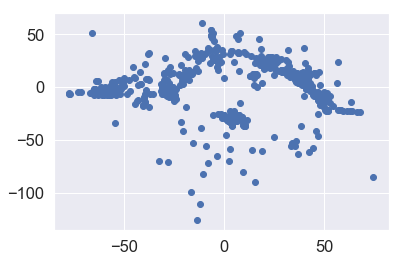

In [16]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)

# Plot that isomap embedding. Each is a model (or a cell, for data)
plt.scatter(*isomap.embedding_.T);
# I don't love the isomap fit

CPU times: user 4.01 s, sys: 25 ms, total: 4.04 s
Wall time: 3.87 s


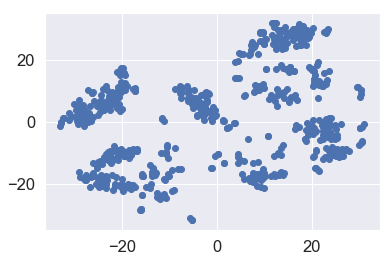

In [19]:
# Do a TSNE embedding in two dimensions
tsne = TSNE(n_components=2, perplexity=30)
%time tsne.fit(df.values)

# Plot that TSNE embedding. Each is a model (or a cell, for data)
plt.scatter(*tsne.embedding_.T);

CPU times: user 3.99 s, sys: 29.7 ms, total: 4.02 s
Wall time: 4.07 s
CPU times: user 4.37 s, sys: 75 ms, total: 4.45 s
Wall time: 4.32 s
CPU times: user 4.41 s, sys: 33.2 ms, total: 4.45 s
Wall time: 4.31 s
CPU times: user 4.81 s, sys: 47.8 ms, total: 4.86 s
Wall time: 4.57 s


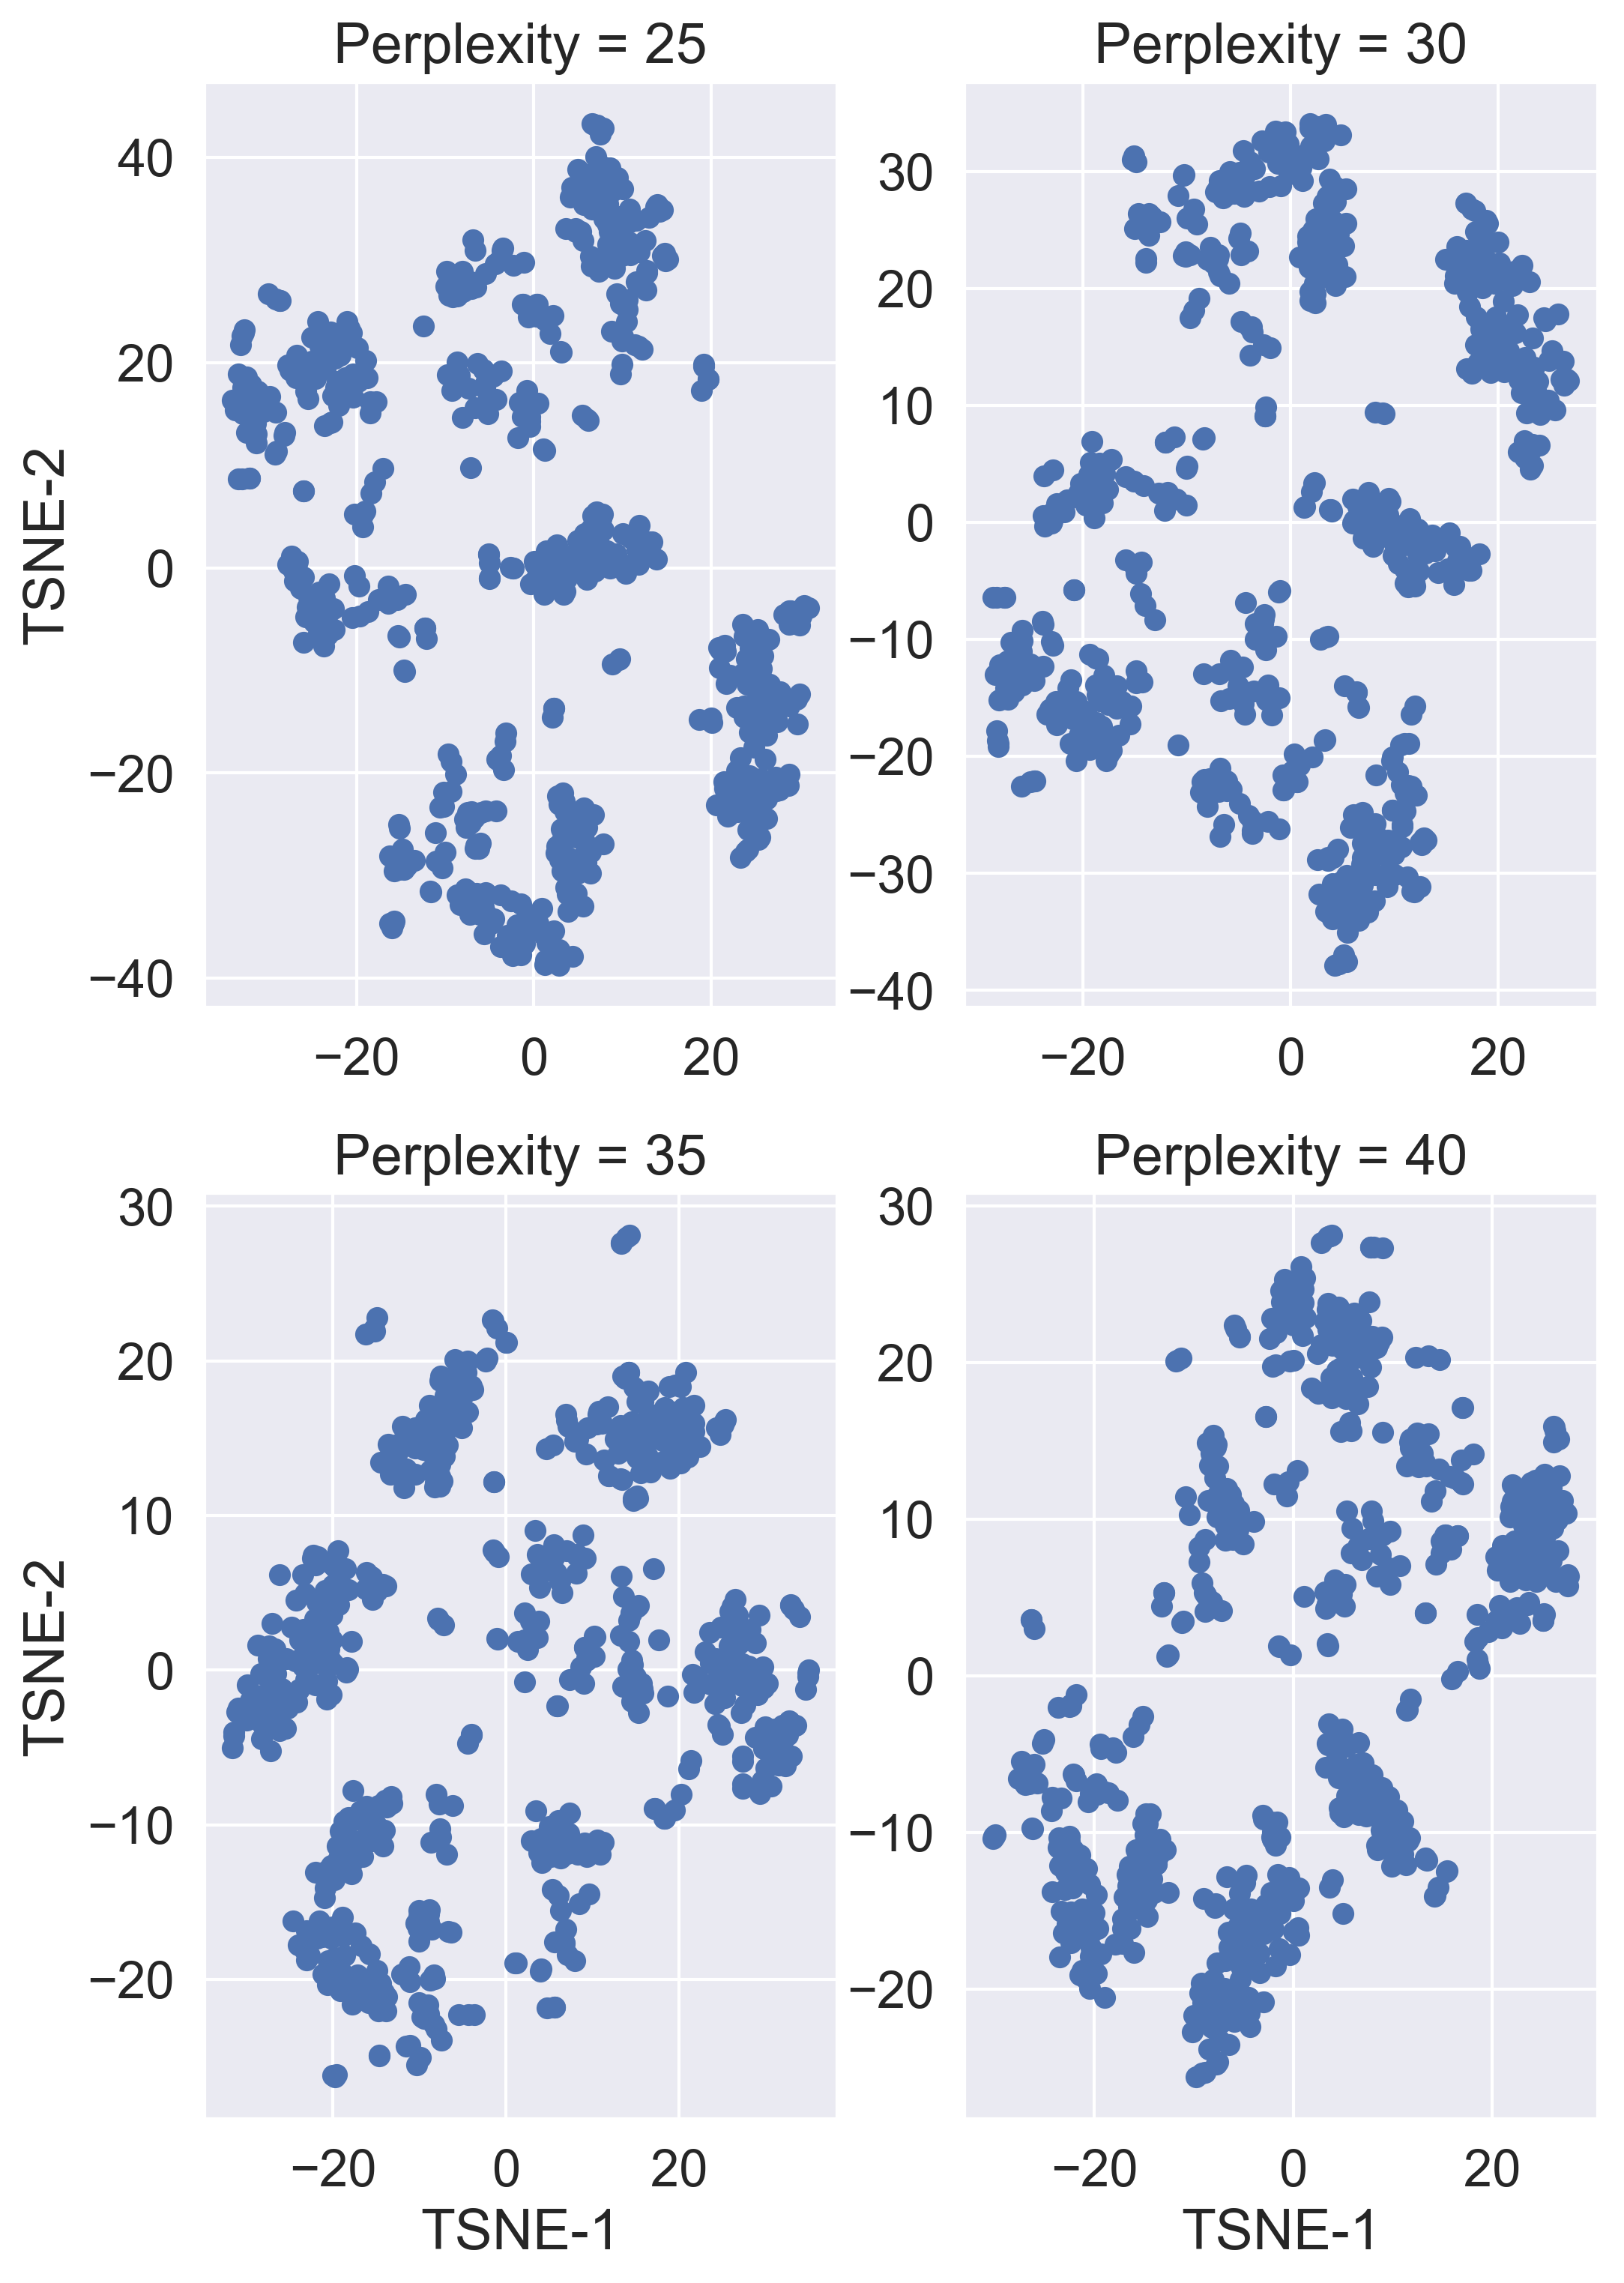

In [25]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

fig, ax = plt.subplots(2,2,figsize=(8,12),dpi=300)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

### Repeat above with just experimental data

In [133]:
# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()

In [134]:
model_no_trans_df.head()

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
Cell_ID,,,,,,,,,,,,,,,,,,,,,
NMLCL000842,90.306840,93.343010,-5.426524,-74.218719,-71.811541,0.005498,92.894193,0.107710,2.400000,71.855740,...,-55.573728,198797.707317,1.987977,-74.037120,324.153334,2.232816,198562.573171,1.985626,-3.755633,0.000730
NMLCL000150,81.865949,80.969000,0.283644,-68.247043,-67.993620,0.110971,78.434834,0.030380,3.433333,69.290314,...,-45.062270,182887.857143,1.828879,-67.929939,221.251466,2.326160,181719.904762,1.817199,-8.663569,0.000743
NMLCL000160,89.106101,84.717406,-1.410831,-72.563673,-72.540797,0.131070,84.871414,0.037688,6.981818,71.020848,...,-54.709880,184062.315789,1.840623,-72.134295,244.702074,2.498303,182681.578947,1.826816,-7.589454,0.000788
NMLCL000480,96.965109,99.273673,-0.766361,-71.834853,-70.845300,-0.000652,97.859439,0.034617,3.215385,76.182726,...,-50.722451,188266.275862,1.882663,-71.583144,378.129070,3.173304,187153.344828,1.871533,-0.664817,0.000796
NMLCL000978,85.260544,81.493220,5.497295,-70.571934,-70.524414,0.037557,76.360187,0.254979,4.770707,68.542857,...,-54.894278,200697.205714,2.006972,-69.426235,209.525059,2.990292,200314.634286,2.003146,-6.602247,0.001017


In [135]:
model_df.head()

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
Cell_ID,,,,,,,,,,,,,,,,,,,,,
NMLCL000842,90.306840,93.343010,-5.426524,-74.218719,-71.811541,0.005498,92.894193,0.107710,2.400000,71.855740,...,-55.573728,198797.707317,1.987977,-74.037120,324.153334,2.232816,198562.573171,1.985626,-3.755633,0.000730
NMLCL000150,81.865949,80.969000,0.283644,-68.247043,-67.993620,0.110971,78.434834,0.030380,3.433333,69.290314,...,-45.062270,182887.857143,1.828879,-67.929939,221.251466,2.326160,181719.904762,1.817199,-8.663569,0.000743
NMLCL000160,89.106101,84.717406,-1.410831,-72.563673,-72.540797,0.131070,84.871414,0.037688,6.981818,71.020848,...,-54.709880,184062.315789,1.840623,-72.134295,244.702074,2.498303,182681.578947,1.826816,-7.589454,0.000788
NMLCL000480,96.965109,99.273673,-0.766361,-71.834853,-70.845300,-0.000652,97.859439,0.034617,3.215385,76.182726,...,-50.722451,188266.275862,1.882663,-71.583144,378.129070,3.173304,187153.344828,1.871533,-0.664817,0.000796
NMLCL000978,85.260544,81.493220,5.497295,-70.571934,-70.524414,0.037557,76.360187,0.254979,4.770707,68.542857,...,-54.894278,200697.205714,2.006972,-69.426235,209.525059,2.990292,200314.634286,2.003146,-6.602247,0.001017


CPU times: user 3.25 s, sys: 27.1 ms, total: 3.28 s
Wall time: 3.31 s
CPU times: user 3.46 s, sys: 17.5 ms, total: 3.48 s
Wall time: 3.49 s
CPU times: user 3.64 s, sys: 17.3 ms, total: 3.65 s
Wall time: 3.67 s
CPU times: user 3.79 s, sys: 14.3 ms, total: 3.81 s
Wall time: 3.82 s


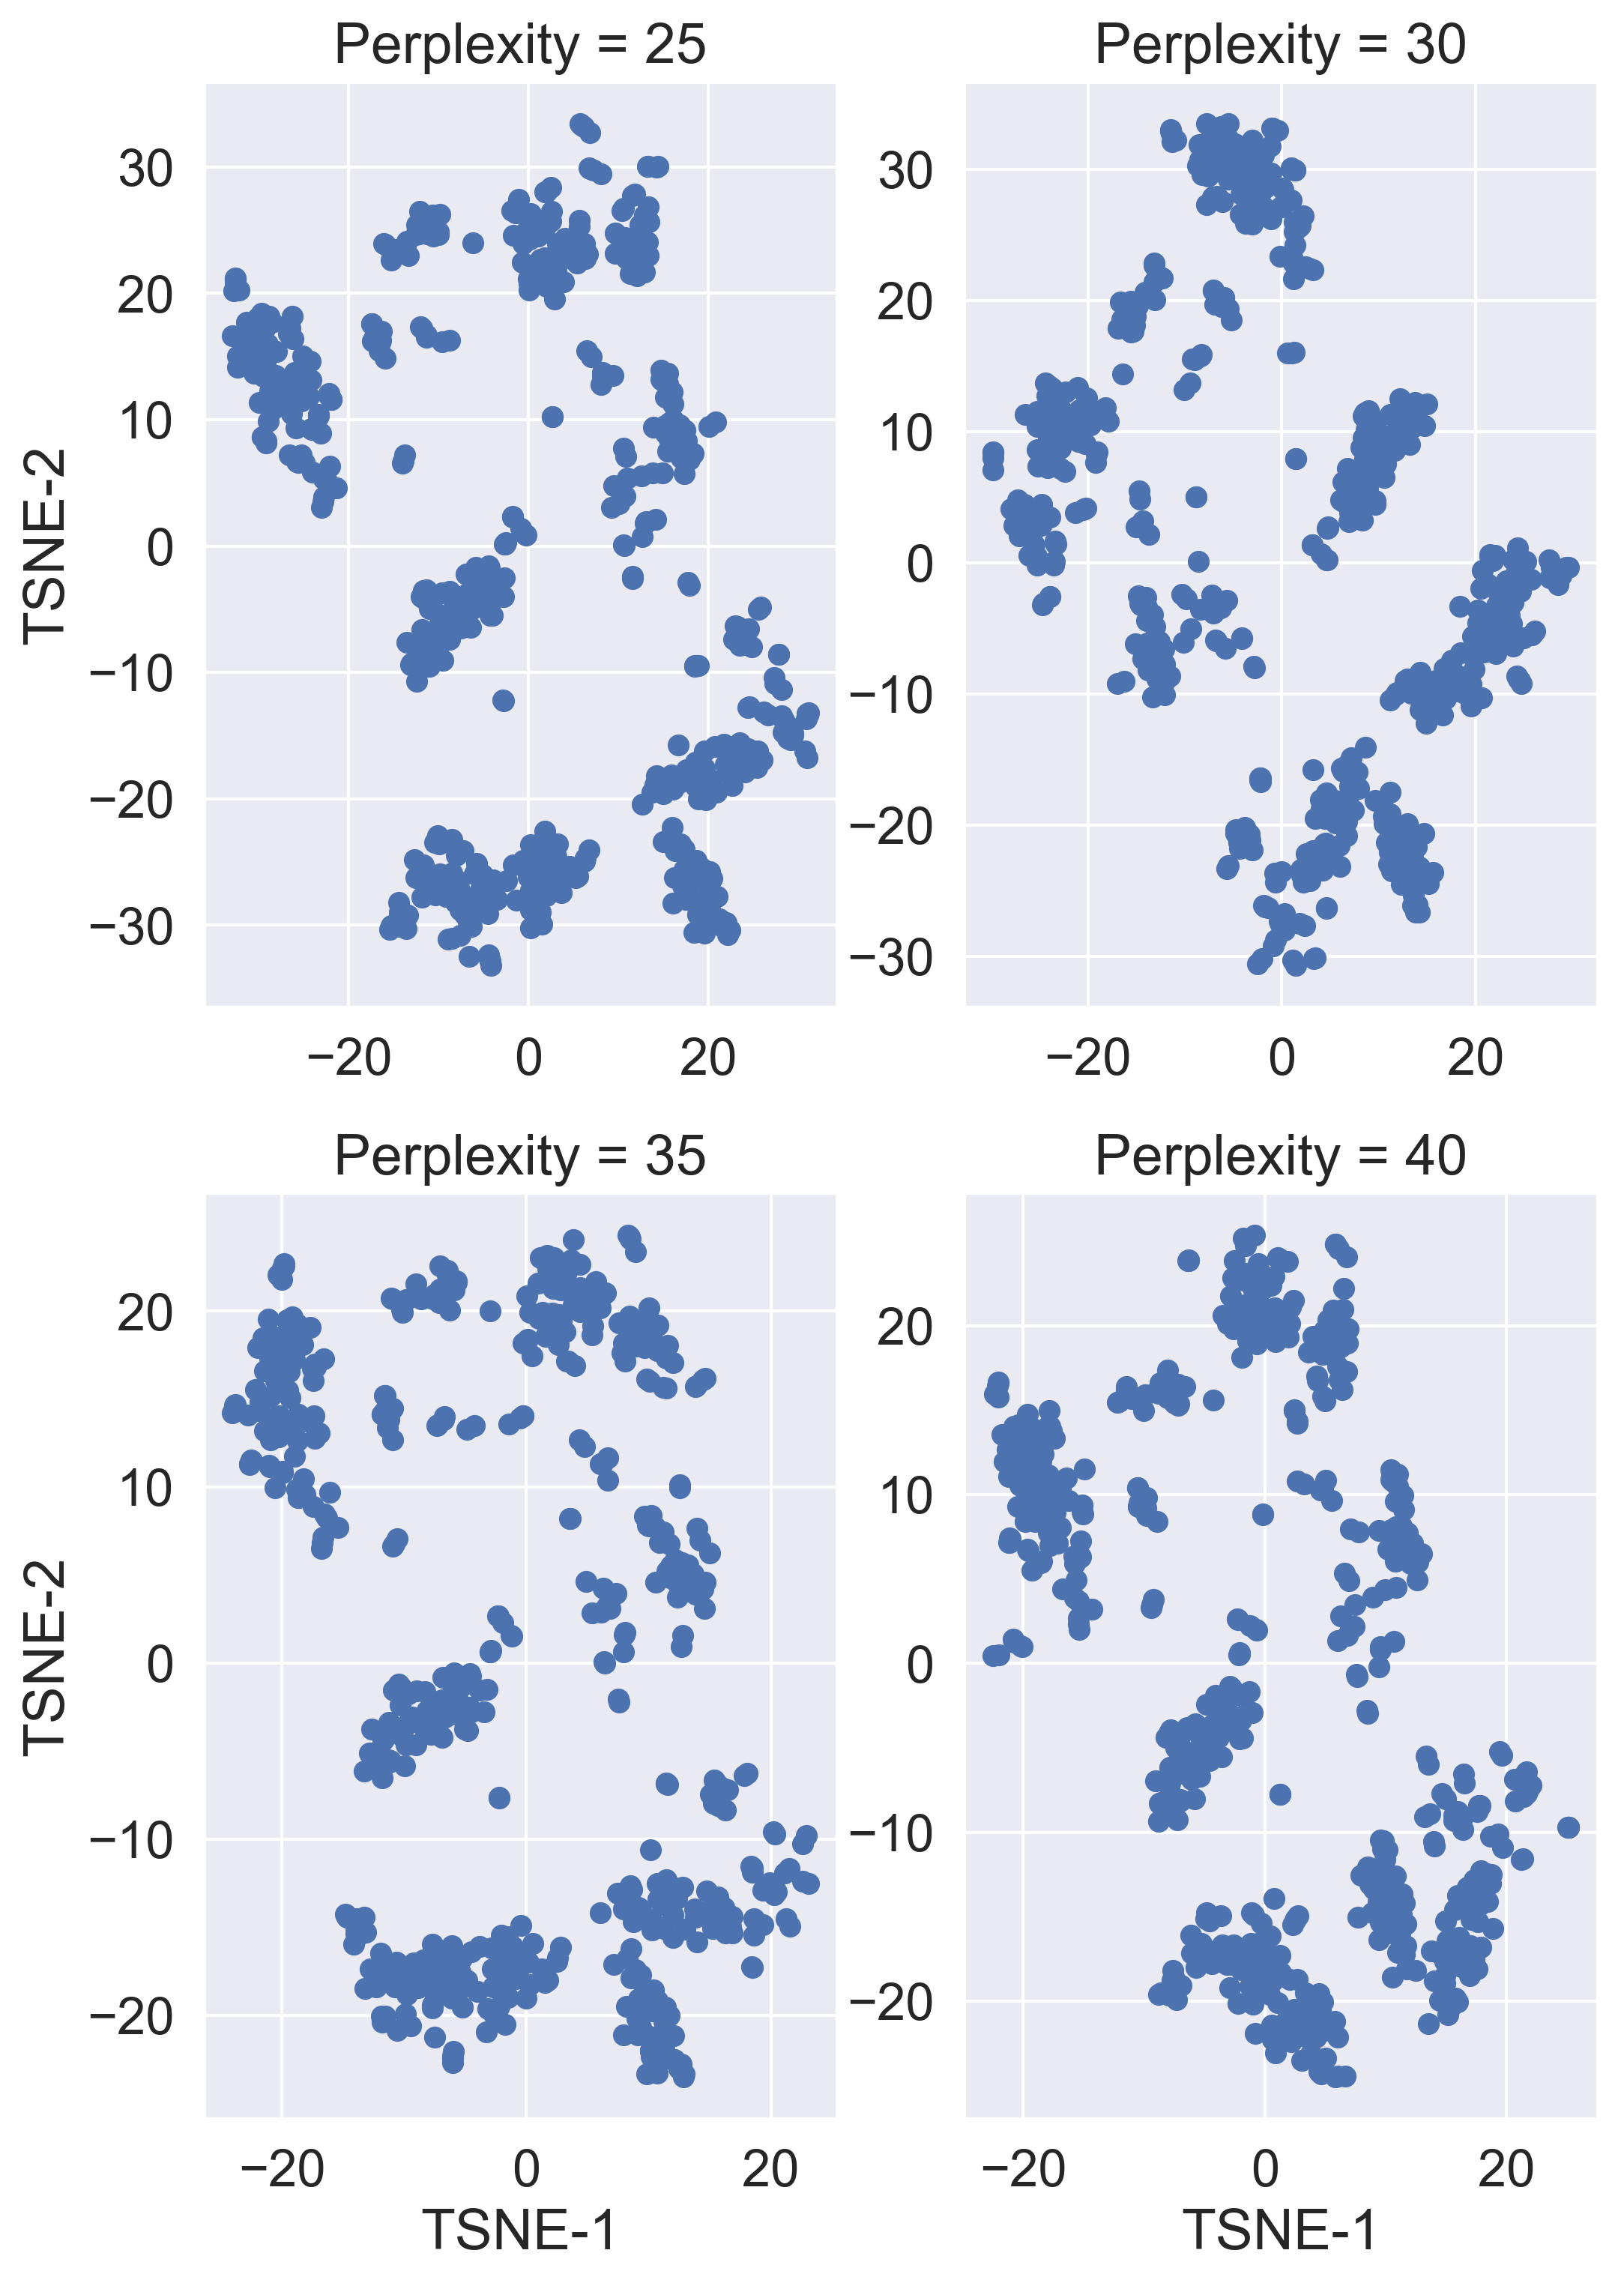

In [73]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

df = model_df.copy()

fig, ax = plt.subplots(2,2,figsize=(8,12))
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

In [136]:
filename = os.path.join(path2data,'new_cortical_ephys.csv')
model_df.to_csv(filename)

filename = os.path.join(path2data,'new_cortical_ephys_no_trans.csv')
model_no_trans_df.to_csv(filename)

filename = os.path.join(path2data,'experiment_ephys_no_trans.csv')
experiment_no_trans_df.to_csv(filename)

In [137]:
experiment_no_trans_df.head()

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
480714960,76.781258,75.375004,11.771517,-60.611238,-46.550307,0.060618,69.539810,0.627230,0.811905,58.531254,...,-39.520184,284338.958333,1.421695,-60.559573,283.238720,1.324309,266935.708333,1.334679,-13.012696,0.000387
479091820,64.625006,0.000000,31.320190,-45.750004,0.000000,0.000000,64.625006,0.000000,3.300000,94.437510,...,-36.031251,413815.000000,2.069075,-61.953127,153.061698,3.643040,207523.500000,1.037618,-11.703125,0.001482
565871768,90.843756,90.875008,16.942003,-58.687504,0.000000,1.437500,90.859382,0.000000,0.900000,69.781256,...,-35.587501,112744.600000,2.254892,-61.600002,356.349566,1.489655,64223.000000,1.284460,0.993750,0.000448
502367941,72.156254,74.593750,9.529117,-57.814238,-58.289065,-0.058824,75.588545,0.110144,7.155556,59.906250,...,-42.127978,97081.357143,1.941627,-54.277532,171.784790,3.379506,96354.047619,1.927081,-23.945686,0.001370
515435668,79.593752,79.000002,19.515216,-48.841252,-50.023100,0.140625,75.090003,0.226091,9.920000,69.375002,...,-38.225144,101509.977273,2.030200,-48.159803,214.453073,4.941094,97611.386364,1.952228,-7.498580,0.001328
